In [1]:
import pandas as pd
import numpy as np

# 读取CSV文件
df = pd.read_csv('data2.csv')
df2 = pd.read_csv('data.csv')

longitude = np.array(df['longitude'])
latitude = np.array(df['latitude'])

longitude_tl = np.array(df2['longitude'])
latitude_tl = np.array(df2['latitude'])

aqi = np.array(df['AQI'])
print(longitude,latitude,aqi)

x=longitude
y=latitude
z=aqi

print("Inf in x:", np.isinf(x).any())
print("NaN in x:", np.isnan(x).any())
print("Inf in y:", np.isinf(y).any())
print("NaN in y:", np.isnan(y).any())
print("Inf in z:", np.isinf(z).any())
print("NaN in z:", np.isnan(z).any())

[118.7897    118.6642    118.5996    118.4883    118.554     118.7047
 118.7411    118.8361    119.097     118.9966    119.2171    118.7582
 118.9129    118.7907    118.7692    118.86      119.0353    119.0844
 119.1152    119.208     119.0709    119.073     118.9133    119.711111
 119.65      119.628056  119.581462  119.531667  119.781111  119.777222
 119.908889  119.311944  119.538611  119.357778  119.614167  119.445556
 119.714444  119.686111  119.674444  120.1067    120.14      120.165
 120.1483    120.1708    120.1933    120.1794    120.1627    120.1716
 120.1783    120.1594    120.1606    120.1808    120.1569    120.1606
 120.1767    120.1867    120.1928    120.2106    120.1972    120.228
 120.2122    120.2667    120.2247    120.1503    120.1517    120.1819
 120.1372    120.1478    120.1194    120.0897    120.145     120.1511
 120.1275    120.1436    120.1283    120.1142    120.0486    120.1236
 120.0603    120.0633    120.1447    120.1016    120.0719    120.1183
 120.1883    120

4it [02:29, 37.27s/it]


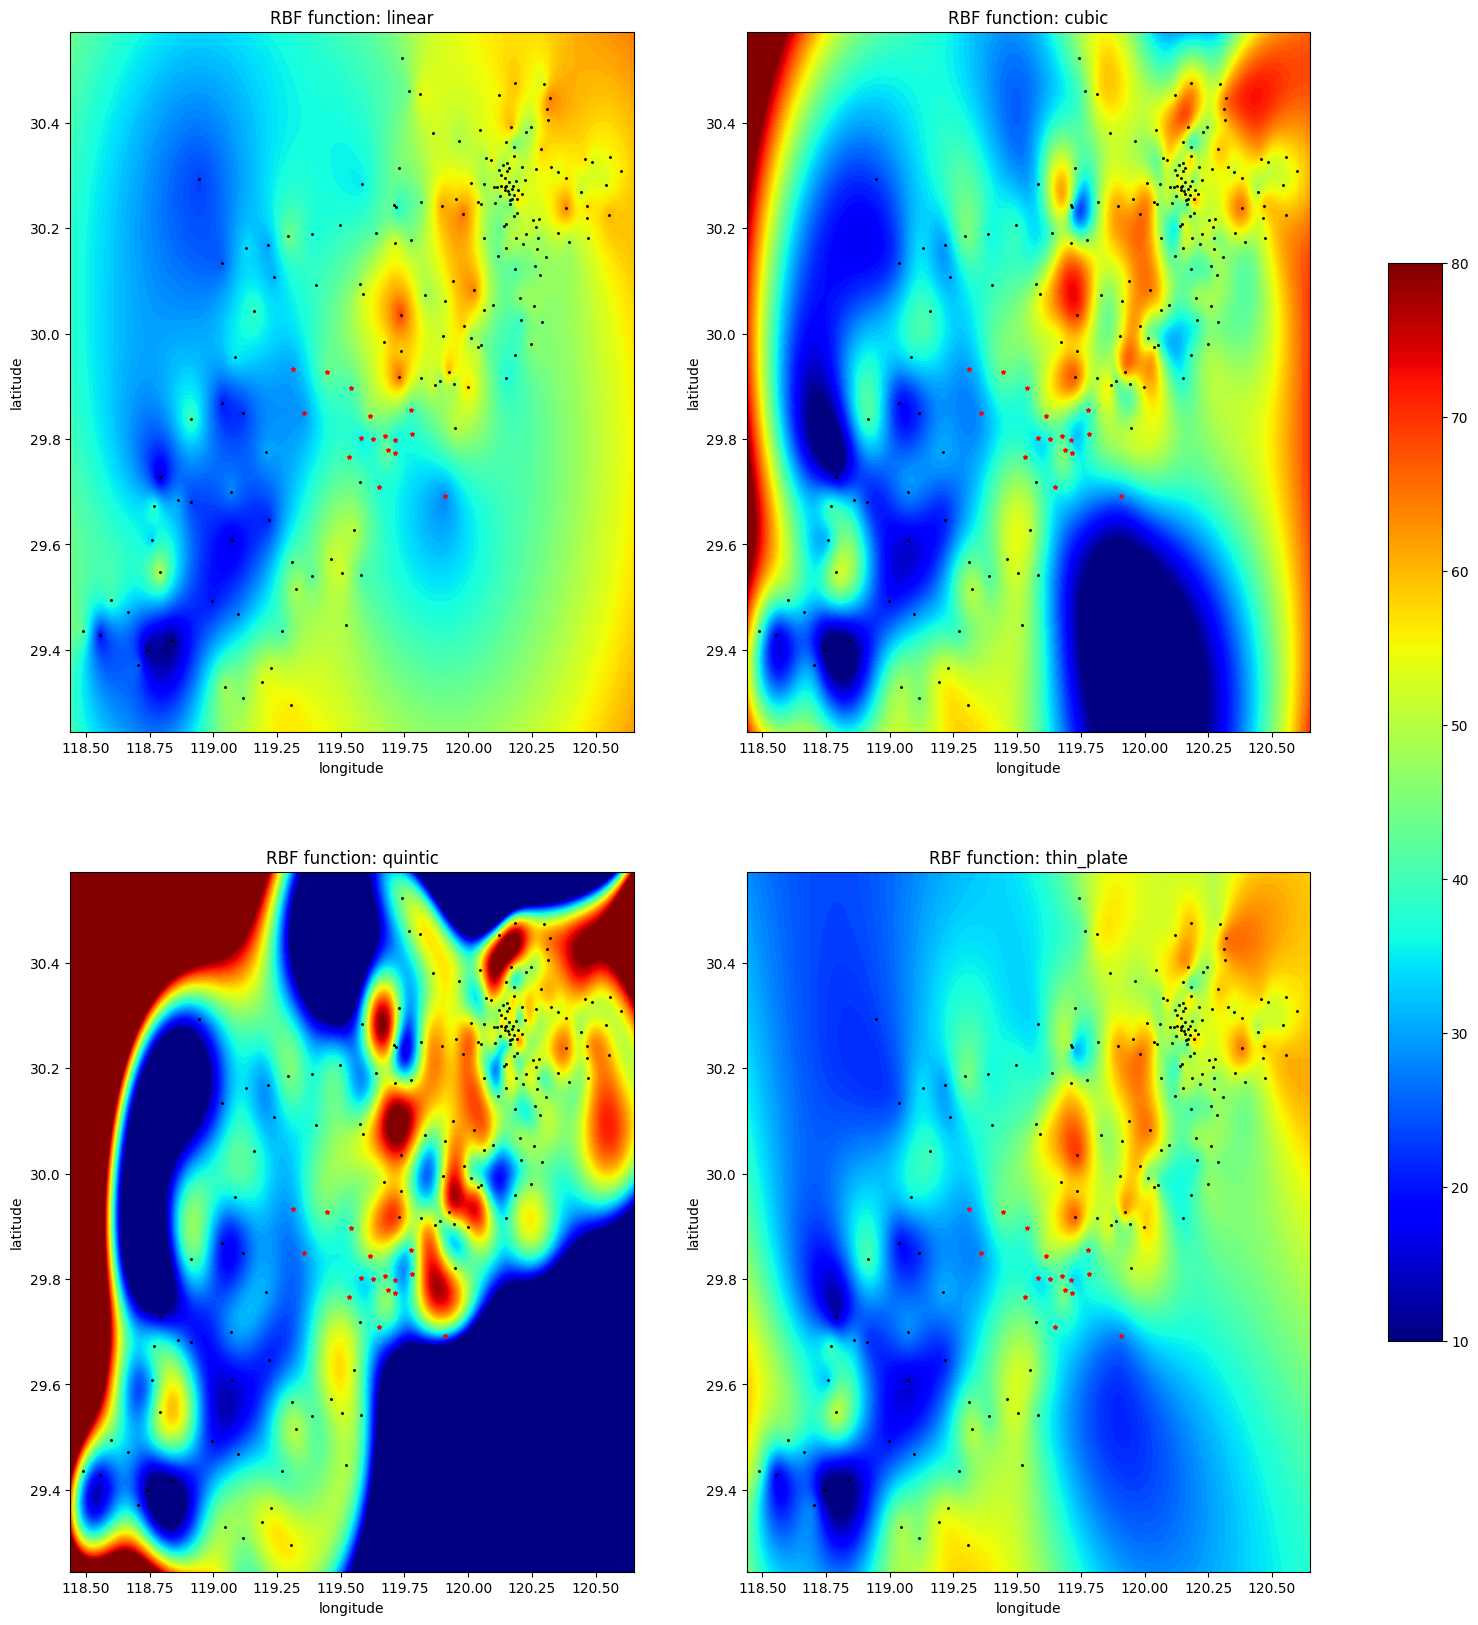

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata, Rbf, RegularGridInterpolator
from tqdm import tqdm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

xi = np.linspace(x.min()-0.05, x.max()+0.05, 2000)
yi = np.linspace(y.min()-0.05, y.max()+0.05, 2000)
xi, yi = np.meshgrid(xi, yi)

# 定义不同的径向基函数
#rbf_functions = ['multiquadric', 'inverse', 'gaussian', 'linear', 'cubic', 'quintic', 'thin_plate']
rbf_functions = ['linear', 'cubic', 'quintic', 'thin_plate']

# 创建一个图和一组子图
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs = axs.flatten()  # 将子图列表转换为一维数组，便于遍历

# 遍历所有径向基函数
for i, _ in tqdm(enumerate(axs)):
    
    function = rbf_functions[i]
    # 创建RBF插值器实例
    rbf = Rbf(x, y, z, function=function)
    # 使用RBF函数进行插值
    grid_aq = rbf(xi, yi)

    # 假设你已经有了插值结果 grid_aq
    aq_min = 10  # 空气质量的合理最小值
    aq_max = 80  # 空气质量的合理最大值

    # 使用clip函数限制插值结果的范围
    grid_aq_clipped = np.clip(grid_aq, aq_min, aq_max)
    
    # 在子图上绘制等高线图
    contour = axs[i].contourf(xi, yi, grid_aq_clipped, levels=100, cmap=plt.cm.jet, vmin=10, vmax=80)
    #axs[i].plot_surface(xi, yi, grid_aq_clipped, cmap=plt.cm.jet, alpha=0.6)
    #fig.colorbar(contour, ax=axs.ravel().tolist(), shrink=0.95)
    axs[i].scatter(x, y, color='black', s=5, marker='.')  # 原始数据点
    axs[i].scatter(longitude_tl, latitude_tl, color='red',s=8,marker='*')
    axs[i].set_title(f'RBF function: {function}')
    axs[i].set_xlabel('longitude')
    axs[i].set_ylabel('latitude')

# 移除子图之间的空白间隔
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# 创建一个用于颜色条的ScalarMappable对象
sm = ScalarMappable(cmap=plt.cm.jet, norm=Normalize(vmin=10, vmax=80))
sm.set_array([])  # 只是需要设置数组，以便后面可以使用

# 添加全局颜色条
cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), shrink=0.7)

plt.show()

4it [02:01, 30.32s/it]


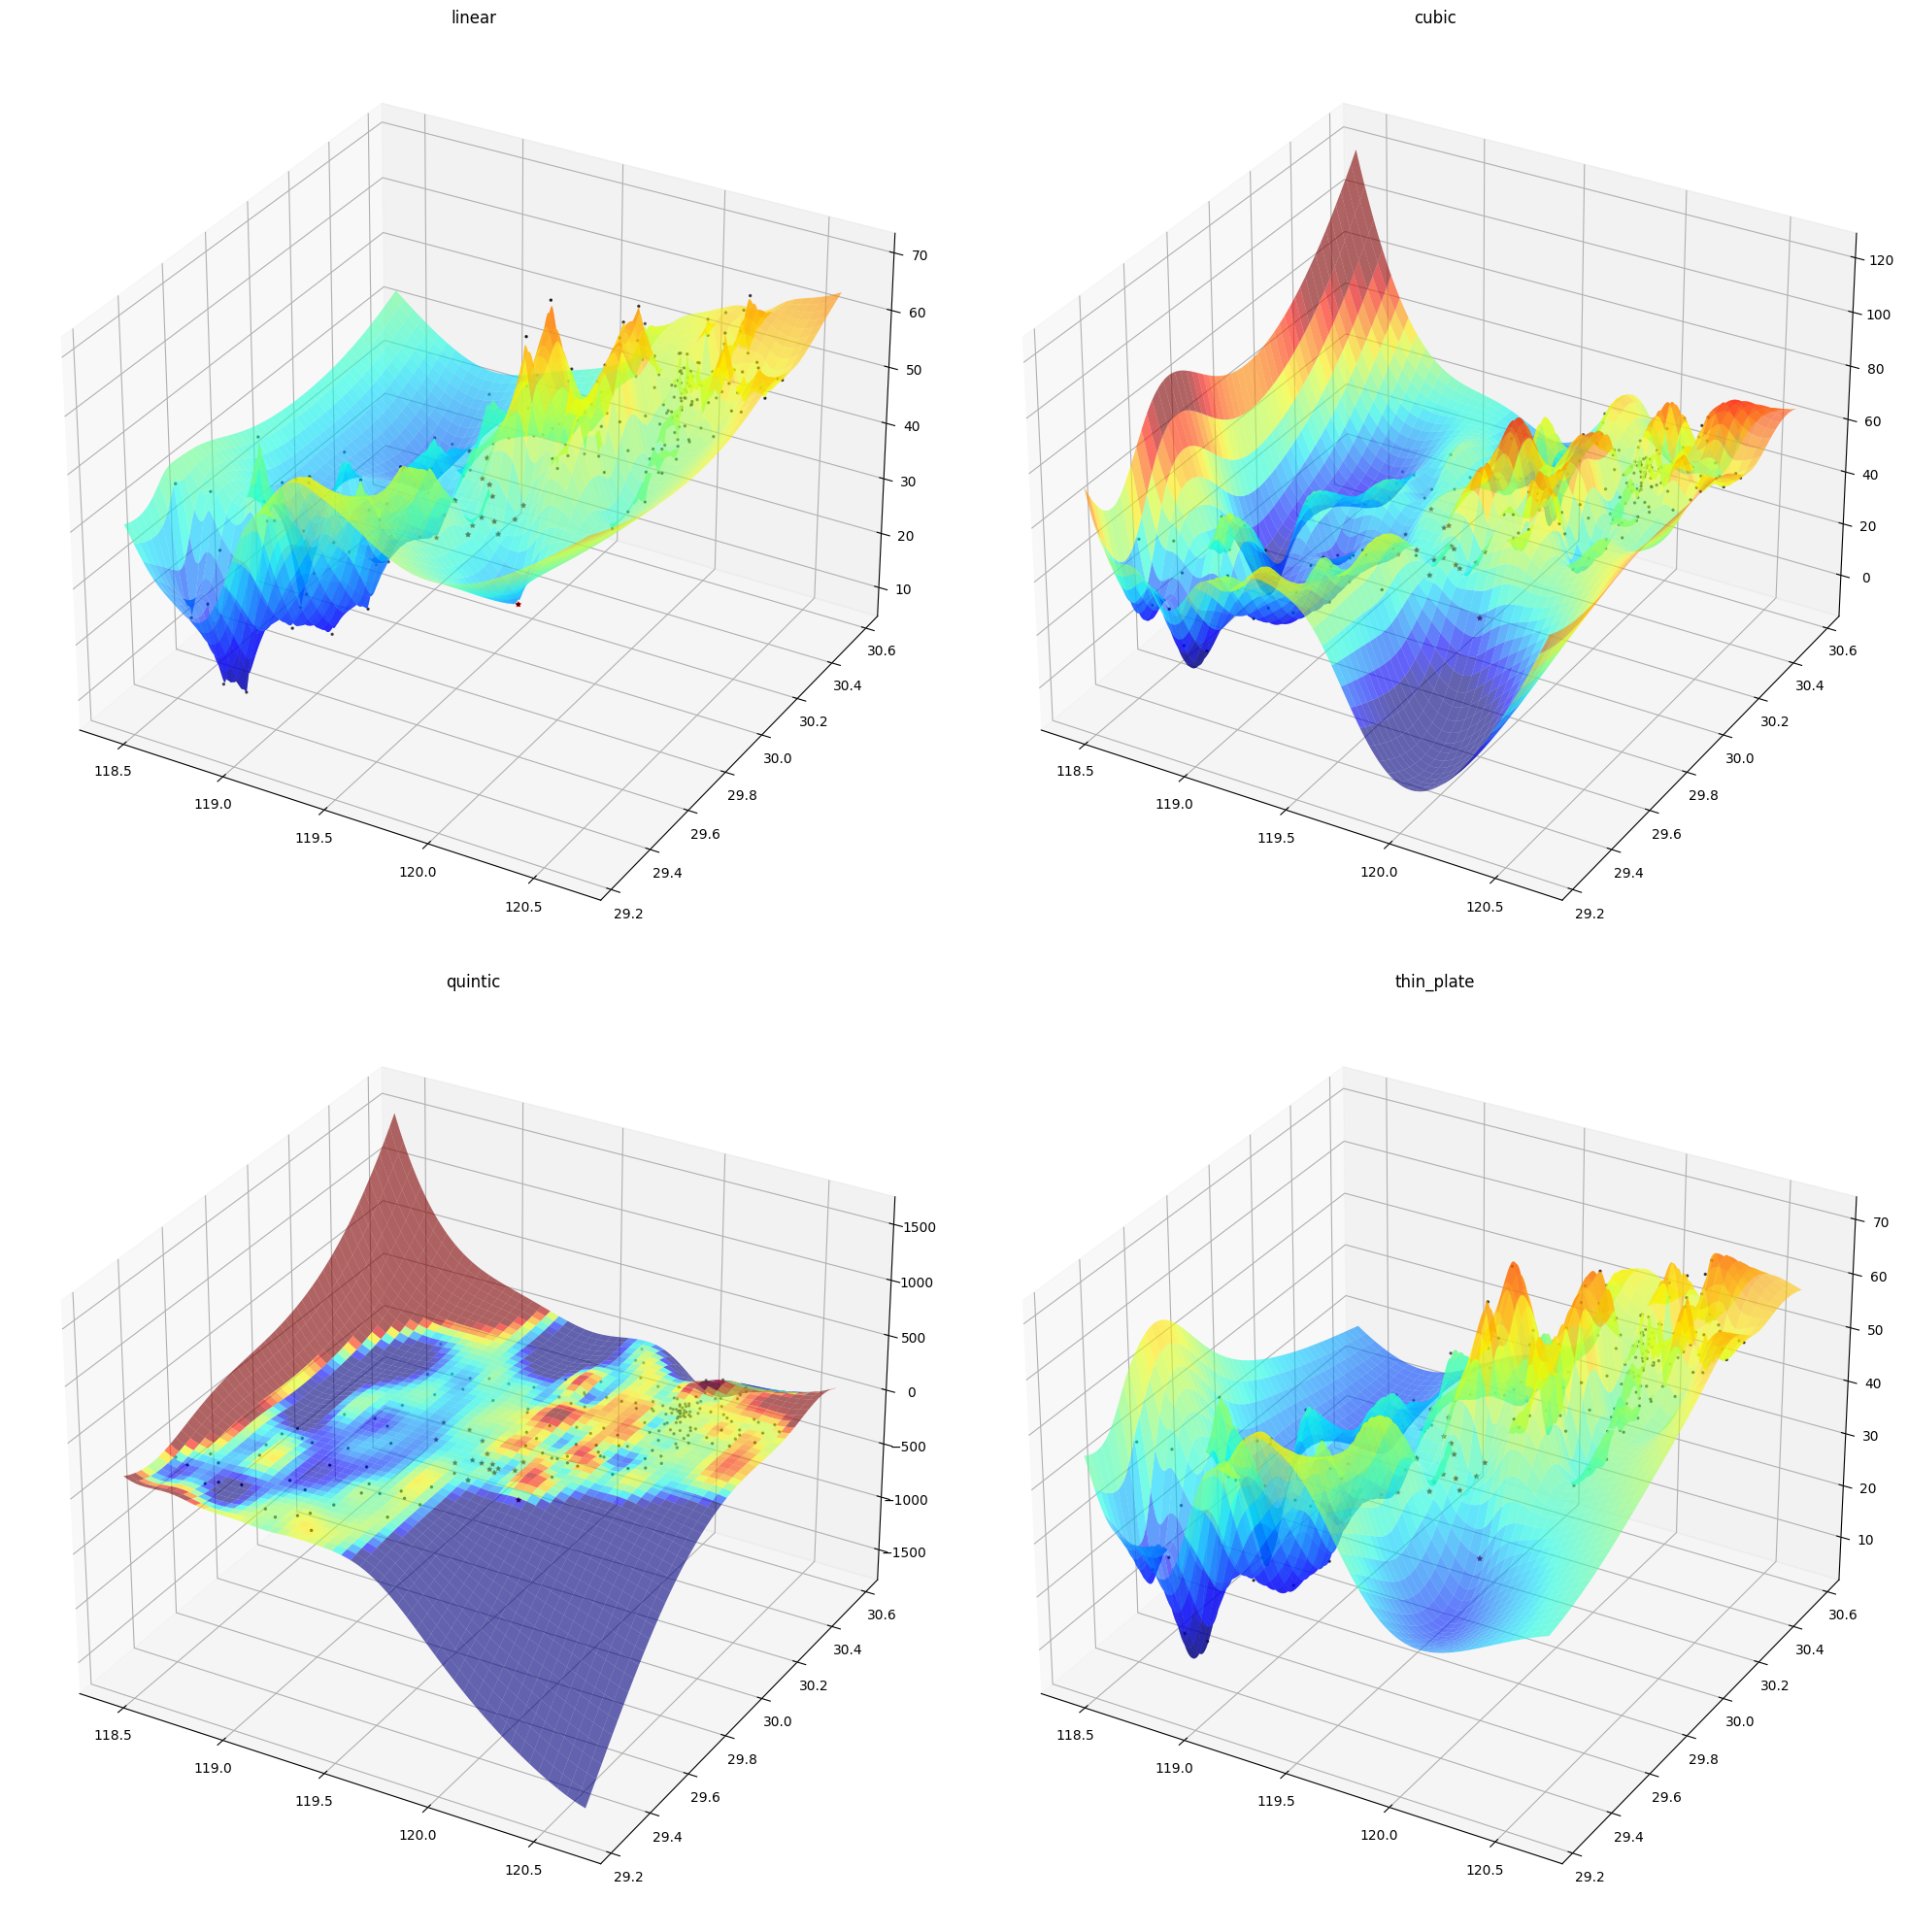

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D

x=longitude
y=latitude
z=aqi

xi = np.linspace(x.min()-0.05, x.max()+0.05, 2000)
yi = np.linspace(y.min()-0.05, y.max()+0.05, 2000)
xi, yi = np.meshgrid(xi, yi)

# 准备绘制子图
fig = plt.figure(figsize=(20, 20))
#functions = ['multiquadric', 'inverse', 'gaussian', 'linear', 'cubic', 'quintic', 'thin_plate']
for i, function in tqdm(enumerate(rbf_functions, start=1)):
    # 创建 RBF 插值器实例
    rbf = Rbf(x, y, z, function=function)
    # 对网格数据进行插值
    zi = rbf(xi, yi)

    # 创建子图
    ax = fig.add_subplot(2, 2, i, projection='3d')
    # 绘制曲面
    surf = ax.plot_surface(xi, yi, zi, cmap=plt.cm.jet, vmin=10, vmax=80, alpha=0.6)
    ax.scatter(x, y, z, color='black', s=8, marker='.')  # 原始数据点
    positions = [np.where(x == item)[0][0] if item in x else None for item in longitude_tl]
    #print(positions)
    ax.scatter(longitude_tl, latitude_tl, z[positions], color='red',s=12,marker='*')
    
    # 添加标题和颜色条
    ax.set_title(function)
    #fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 调整子图间距
plt.tight_layout()

# 创建一个用于颜色条的ScalarMappable对象
sm = ScalarMappable(cmap=plt.cm.jet, norm=Normalize(vmin=10, vmax=80))
sm.set_array([])  # 只是需要设置数组，以便后面可以使用

# 添加全局颜色条
cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), shrink=0.7)
plt.show()

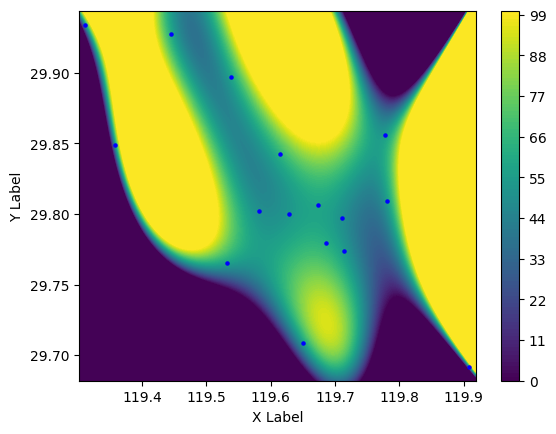

In [5]:
# 创建图形
fig, ax = plt.subplots()

# 绘制等高线图
CS = ax.contourf(xi, yi, zi_cubic_clipped, levels=100, cmap=plt.cm.viridis)

# 绘制原始散点
ax.scatter(x, y, marker='o', c='b', s=5, zorder=10)

# 添加等高线标签
#plt.clabel(CS, inline=True, fontsize=8)

# 设置标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# 添加颜色条
plt.colorbar(CS)

# 显示图形
plt.show()

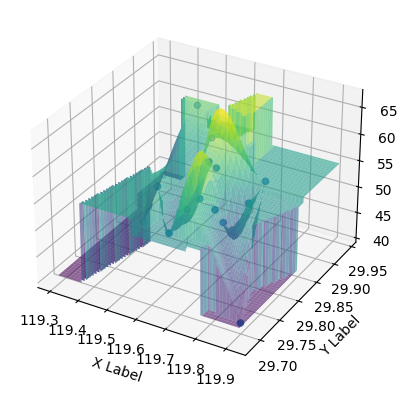

In [9]:
# 创建图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(x, y, z)

# 绘制曲面
ax.plot_surface(xi, yi, zi_cubic, cmap=plt.cm.viridis, alpha=0.6)

# 设置标签
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 显示图形
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata, Rbf

x=longitude
y=latitude
z=aqi
# 创建网格数据
xi = np.linspace(x.min()-0.01, x.max()+0.01, 1000)
yi = np.linspace(y.min()-0.01, y.max()+0.01, 1000)
xi, yi = np.meshgrid(xi, yi)

# 首先使用cubic插值
zi_cubic = griddata((x, y), z, (xi, yi), method='cubic')

# 检查zi_cubic中的NaN值，并记录它们的位置
nan_positions = np.isnan(zi_cubic)

# 只在nan_positions为True的位置上进行nearest插值
zi_nearest = griddata((x, y), z, (xi, yi), method='nearest')

# 使用nearest插值的结果填充cubic插值中的NaN值
zi_cubic[nan_positions] = zi_nearest[nan_positions]

# 如果存在 NaN，手动填充这些位置
'''if np.any(nan_positions):
    # 比如可以用周围非 NaN 的平均值填充（这只是一个简单的例子）
    for i in range(xi.shape[0]):
        for j in range(yi.shape[1]):
            if nan_positions[i, j]:
                # 取得周围点的值
                values = []
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        if (0 <= i + di < xi.shape[0]) and (0 <= j + dj < yi.shape[1]):
                            if not nan_positions[i + di, j + dj]:
                                values.append(zi_cubic[i + di, j + dj])
                # 如果周围有非 NaN 的值，则计算平均值
                if values:
                    zi_cubic[i, j] = np.mean(values)'''


'if np.any(nan_positions):\n    # 比如可以用周围非 NaN 的平均值填充（这只是一个简单的例子）\n    for i in range(xi.shape[0]):\n        for j in range(yi.shape[1]):\n            if nan_positions[i, j]:\n                # 取得周围点的值\n                values = []\n                for di in [-1, 0, 1]:\n                    for dj in [-1, 0, 1]:\n                        if (0 <= i + di < xi.shape[0]) and (0 <= j + dj < yi.shape[1]):\n                            if not nan_positions[i + di, j + dj]:\n                                values.append(zi_cubic[i + di, j + dj])\n                # 如果周围有非 NaN 的值，则计算平均值\n                if values:\n                    zi_cubic[i, j] = np.mean(values)'